In [1]:
#Data loading and initial exploration
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [5]:
#load the data
df=pd.read_csv('Iris.csv')
#show basic information
print(df.columns)
#Show the 1st five lines of the data
df.head()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
samples=df.sample()
df_classes=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
print(samples.columns[0:5].values, 'Species')

['Id' 'SepalLengthCm' 'SepalWidthCm' 'PetalLengthCm' 'PetalWidthCm'] Species


In [8]:
#Find null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
#Check for Missing Values
missing_values = data.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


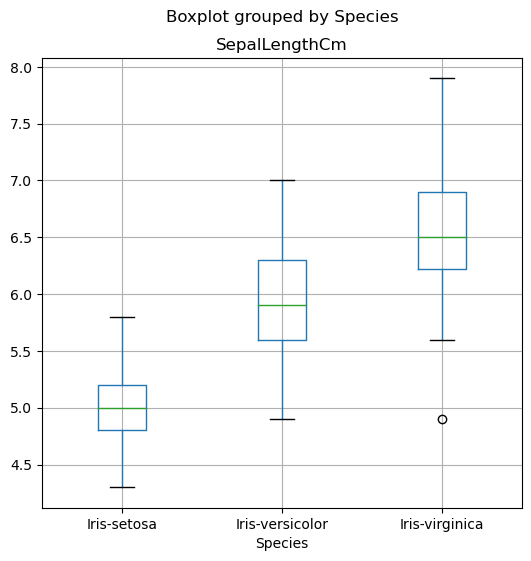

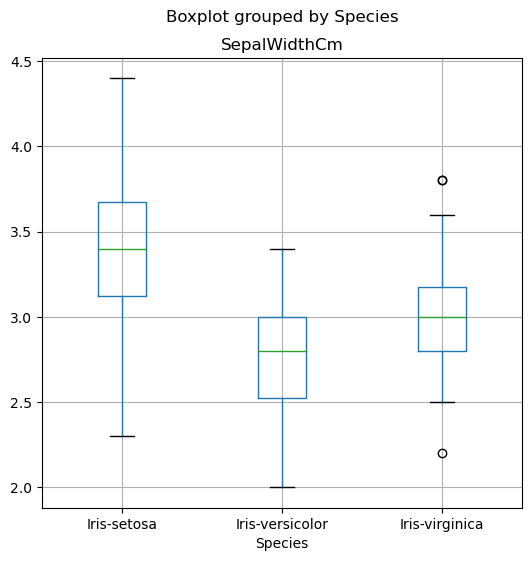

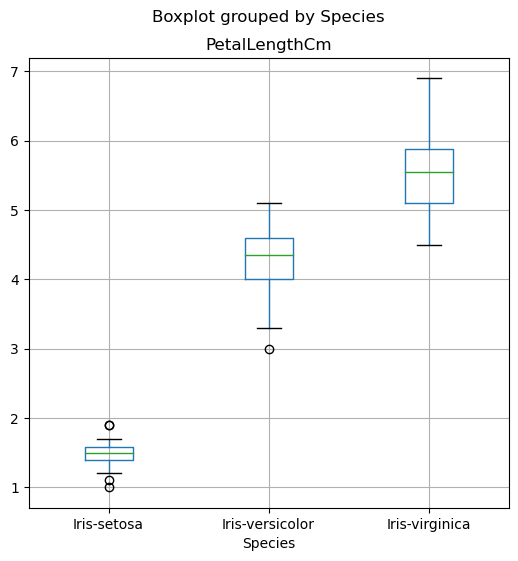

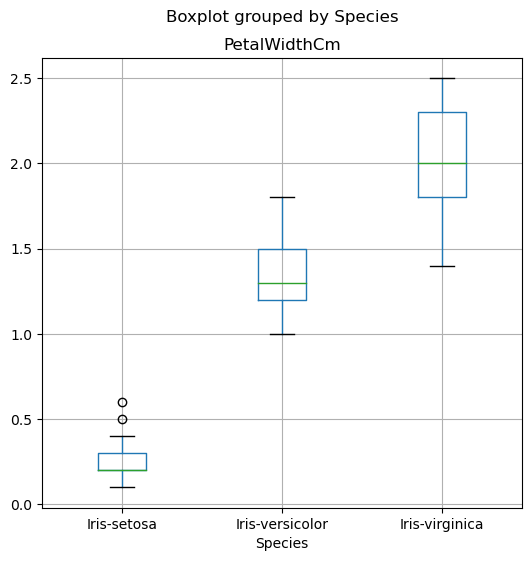

In [11]:
#Data visualizations
df_features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
df_label = 'Species'
for col in df_features:
    df.boxplot(column=col, by=df_label, figsize=(6,6))
    plt.title(col)
plt.show()


In [14]:
#split the data into features and labels
from sklearn.model_selection import train_test_split,GridSearchCV

# Separate features and labels
df_X, df_y = df[df_features].values, df[df_label].values

# Split data 60%-40% into training set and test set
x_df_train, x_df_test, y_df_train, y_df_test = train_test_split(df_X, df_y,
                                                                                    test_size=0.40,
                                                                                    random_state=0,
                                                                                    stratify=df_y)

print ('Training Set: %d, Test Set: %d \n' % (x_df_train.shape[0], x_df_test.shape[0]))

Training Set: 90, Test Set: 60 



In [15]:
#Chose the Machine learning algorithm for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(x_df_train, y_df_train)

# Make predictions on the testing data
y_pred = clf.predict(x_df_test)

# Calculate accuracy
accuracy = accuracy_score(y_df_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


In [17]:
#Perform hyperparameter tuning

# Define hyperparameter search space
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_df_train, y_df_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate on test set
accuracy = best_model.score(x_df_test, y_df_test)
print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {accuracy:.2f}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Test Accuracy: 0.98


In [18]:
#Limitation of DecisionTree Algorithm
"""The main limitation of this algorithm is overfitting,
Decision trees have a tendency to overfit when they become too complex,in this case,
overfitting might occur if the decision tree becomes too deep and complex, capturing noise in the feature 
space resulting in capturing noise and outliers in the training data. This can lead to poor generalization to new, 
unseen data."""


'The main limitation of this algorithm is overfitting,\nDecision trees have a tendency to overfit when they become too complex,in this case,\noverfitting might occur if the decision tree becomes too deep and complex, capturing noise in the feature \nspace resulting in capturing noise and outliers in the training data. This can lead to poor generalization to new, \nunseen data.'

In [19]:
#Importance of Feature selection and preprocessing
"""Feature selection and preprocessing play pivotal roles in enhancing the performance,
interpretability, and efficiency of machine learning models. Properly selected features and
a well-preprocessed dataset contribute to the model's 
ability to generalize well to new, unseen data and make accurate predictions."""

"Feature selection and preprocessing play pivotal roles in enhancing the performance,\ninterpretability, and efficiency of machine learning models. Properly selected features and\na well-preprocessed dataset contribute to the model's \nability to generalize well to new, unseen data and make accurate predictions."